<center> <span center style="color:red"> <b> Sparks Fondation @GRIP July2022 </span> </center>
  <center> Name: <span style='background :yellow'> <b> Rania Fradi </span> </center>   <br>
        

 <center>  <b>Task2: Predict the optimum number of clusters and represent it visually:<center> <br>  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

<i> Reading the csv file  

In [2]:
db = datasets.load_iris()
db_df = pd.DataFrame(db.data, columns = db.feature_names)
db_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<i>Finding the optimum number of clusters for k-means classification

In [3]:
x = db_df.iloc[:, [0, 1, 2, 3]].values
wcss = [] # Within cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

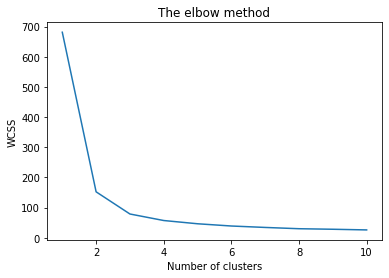

In [4]:
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
# we coose the number of cluster = 3

<i>Creating the kmeans classifier

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
            max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<i>Visualising the clusters

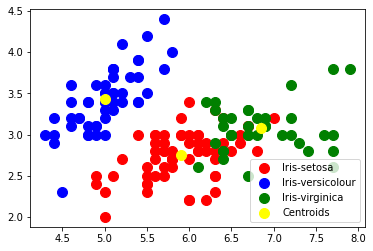

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

C:\Users\Rania Fradi\AppData\Local\Temp\ipykernel_10140\3912146157.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


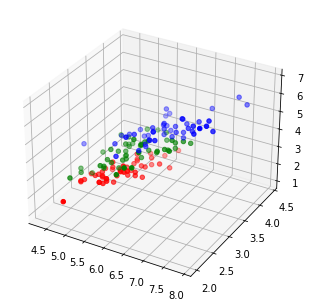

In [7]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x[:50,0],x[:50,1],x[:50,2],color='red')
ax.scatter(x[50:100,0],x[50:100,1],x[50:100,2],color='green')
ax.scatter(x[100:150,0],x[100:150,1],x[100:150,2],color='blue')
plt.show()